### Student Name: Cathal Cronin
### ID: 10131531

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Load the data
data = pd.read_csv("Task4.csv") 
data.head()

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [3]:
# Ref: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
# https://machinelearningmastery.com/solve-linear-regression-using-linear-algebra/
# https://github.com/marcopeix/ISL-linear-regression/blob/master/Linear%20Regression.ipynb

def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [10]:
# Copy functions from other notebook and updated for linear regression.

def linear_regression(X, y):
    X_inverse = np.linalg.pinv(X)
    w_lin = np.matmul(X_inverse, y)
    
    return w_lin

def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

def calc_errors(a, b):
    e_sq = 0
    N = len(a)
    for i in range(N):
        e_sq += math.pow((a[i] - b[i]),2)
        
    return e_sq/N , math.sqrt(e_sq/N) 
    
    return math.sqrt(e_sq / len(a))

def calculate_and_plot_linear_regression(X, y):
    # shuffle data
    X, y = shuffle(X, y, random_state=0)

    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10131531)

    # Linear regression
    weights = linear_regression(X_train, y_train)
    
    # Plot test data
    plt.scatter(X[:,1], y, c=y)

    # Plot
    minx = np.amin(X)
    maxx = np.amax(X)  
    s = len(X[:,1])
    x_line = np.linspace(minx, maxx, s)
    y_line = calc_polynom(weights, x_line)
    plt.plot(x_line, y_line)
    
    # yhat
    yhat = X_test.dot(weights)
    plt.scatter(X_test[:,1], yhat, c='red')
    
    # error
    error = calc_square_error(y_test, yhat)
    
    # Marker for center point at coordinates (0,0)
    plt.plot([0], [0], marker='x', markersize=30, color="blue")
    
    # Print errors to see how well it's doing
    print("RMSE: %s" % rmse)
    print("MSE: %s" % mse)
    
    return weights, yhat, error

In [5]:
### Linear Regression of X

NameError: name 'rmse' is not defined

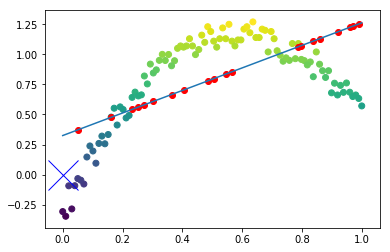

In [6]:
# Similar to before we're trying to fit the data in it's stadnard form, 
# next we will try a square approach like before and see how that improves the fit.
bias = np.ones(len(data['X'].values))
tranformX =  np.vstack((bias, data['X'].values))
tranformX = tranformX.T
weights, yhat, mse = calculate_and_plot_linear_regression(tranformX, data['y'].values.T)



In [ ]:
# Doesn't do a great job of fitting our points. Lets try squaring like in the other notebook 

In [ ]:
origX = data['X'].values
origY = data['y'].values

X_square = np.square(origX)
Y_square = np.square(origY)

bias = np.ones(len(X_square))
transformedX =  np.vstack((bias, origX))
transformedX2 =  np.vstack((transformedX, X_square))

weights, yhat, mse = calculate_and_plot_linear_regression(newX2.T, origY.T)


In [ ]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# LinearRegression expects an array of shape (n, 1) for the "Training data"
origX = data['X'].values[:, np.newaxis]

# target data is array of shape (n,) 
origY = data['y'].values

X_train, X_test, y_train, y_test = train_test_split(origX, origY, test_size=0.2, random_state=10131531)

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(origX)

model2 = LinearRegression()
model2.fit(x_poly, origY)
y_poly_pred = model2.predict(x_poly)

rmse = np.sqrt(mean_squared_error(origY, y_poly_pred))
mse = r2_score(origY, y_poly_pred)
print("RMSE: %s" % rmse)
print("MSE: %s" % mse)

plt.scatter(origX, origY, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(origX, y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(origX, y_poly_pred, color='m')
plt.show()

We can see that MSE has increased when compared to the linear line approach above.